In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('./D9x.csv',  index_col=None)
# data = pd.read_csv('./IntE_terms_for_Reweighting.csv',  index_col=None)



def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


In [2]:
data

,System,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,WT-Ca,-1950.9,-25.9,732.3,15.6,-1228.9,71000.0
1,D9M-Nd,-3807.2,42.4,721.5,37.2,-3006.1,2150.0
2,D9H-Nd,-3842.6,43.4,754.4,39.7,-3005.1,1460.0
3,D9A-Nd,-3798.1,44.4,723.2,37.2,-2993.3,397.0
4,D9N-Nd,-3839.3,44.8,655.2,38.4,-3100.9,53.1
5,WT-Nd,-3339.8,38.9,730.1,36.7,-2534.1,5.3


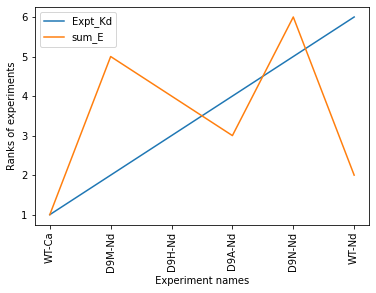

In [3]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = [i+1 for i in range(len(y1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel('Ranks of experiments')
plt.xlabel(' Experiment names ')
plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(['Expt_Kd','sum_E'])

In [4]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 2, 3, 4, 5, 6]


In [5]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[-1950.9,   -25.9,   732.3,    15.6],
       [-3807.2,    42.4,   721.5,    37.2],
       [-3842.6,    43.4,   754.4,    39.7],
       [-3798.1,    44.4,   723.2,    37.2],
       [-3839.3,    44.8,   655.2,    38.4],
       [-3339.8,    38.9,   730.1,    36.7]])

In [6]:
list_ = indexify(data['sum_E'])

print(list_)

[1, 5, 4, 3, 6, 2]


In [7]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [8]:
frac = np.linspace(0,1,11)
mult = np.linspace(2,10,9)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [9]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1

c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [10]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [27]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')
main_data

,w1,w2,w3,w4,sum
14809,0.1,8.0,0.0,0.9,-1.000000
22814,0.2,8.0,0.0,5.0,-1.000000
22815,0.2,8.0,0.0,6.0,-1.000000
22014,0.2,6.0,0.0,5.0,-1.000000
13611,0.1,5.0,0.0,2.0,-1.000000
...,...,...,...,...,...
20295,0.2,1.0,5.0,6.0,0.428571
20296,0.2,1.0,5.0,7.0,0.428571
44782,0.5,2.0,10.0,0.2,0.428571
26364,0.3,0.5,9.0,0.4,0.428571


In [34]:
main_data = main_data[main_data['sum']>sum_calc_easy([1,1,1,1], kd_rank, data_4)]
main_data

,w1,w2,w3,w4,sum
135192,7.0,8.0,10.0,3.0,0.229668
130380,7.0,0.5,10.0,0.0,0.229668
106298,4.0,0.5,5.0,9.0,0.229668
69719,0.8,5.0,0.5,10.0,0.229668
133190,7.0,3.0,10.0,1.0,0.229668
...,...,...,...,...,...
20294,0.2,1.0,5.0,5.0,0.428571
20295,0.2,1.0,5.0,6.0,0.428571
20296,0.2,1.0,5.0,7.0,0.428571
44782,0.5,2.0,10.0,0.2,0.428571


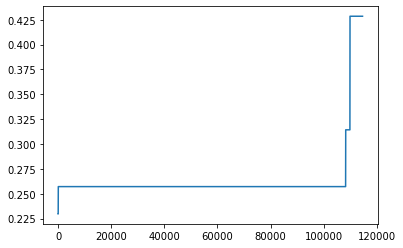

In [29]:
import matplotlib.pyplot as plt
plt.plot([x+1 for x in range(len(sorted_dataframe['sum']))], sorted_dataframe['sum'])

In [15]:
weights = main_data[main_data['sum']==max(list(main_data['sum']))]
weights = np.array(weights)[-1][:-1]
weights

array([0.3, 0.5, 9. , 0.4])

In [16]:
max(list(main_data['sum']))

0.4285714285714286

In [35]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-1]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [18]:
system

{'WT-Ca': {'energy': array([-1950.9, -25.9, 732.3, 15.6], dtype=object),
  'kd': 71000.0,
  'sum': -1228.9000000000003,
  'weighted_energy': array([-585.2700000000001, -12.95, 6590.7, 6.24], dtype=object),
  'weighted_sum': 5998.719999999999,
  'frac_contribution': array([-0.09756581404032863, -0.002158793876026886, 1.0986843860023472,
         0.001040221914008322], dtype=object)},
 'D9M-Nd': {'energy': array([-3807.2, 42.4, 721.5, 37.2], dtype=object),
  'kd': 2150.0,
  'sum': -3006.1,
  'weighted_energy': array([-1142.16, 21.2, 6493.5, 14.880000000000003], dtype=object),
  'weighted_sum': 5387.42,
  'frac_contribution': array([-0.21200500425064317, 0.003935093235723222, 1.2053079210456954,
         0.0027619899692246015], dtype=object)},
 'D9H-Nd': {'energy': array([-3842.6, 43.4, 754.4, 39.7], dtype=object),
  'kd': 1460.0,
  'sum': -3005.1,
  'weighted_energy': array([-1152.7800000000002, 21.7, 6789.599999999999, 15.880000000000003],
        dtype=object),
  'weighted_sum': 5674.4

In [36]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [37]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,WT-Ca,1,1,1
1,D9M-Nd,2,5,5
2,D9H-Nd,3,4,2
3,D9A-Nd,4,3,4
4,D9N-Nd,5,6,6
5,WT-Nd,6,2,3


In [38]:
print(kd_rank)

print(sum_wE)
print(np.corrcoef(kd_list,sum_wE)[1][0])

print('----------------------')


print(kd_list)
print(sum_E)
print(np.corrcoef(kd_list,sum_E)[1][0])

[1, 2, 3, 4, 5, 6]
[1, 5, 2, 4, 6, 3]
0.4285714285714286
----------------------
[1, 2, 3, 4, 5, 6]
[1, 5, 4, 3, 6, 2]
0.2


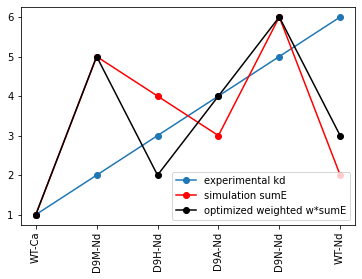

In [39]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = 'r', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = 'k', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)

plt.legend(['experimental kd','simulation sumE', 'optimized weighted w*sumE'])


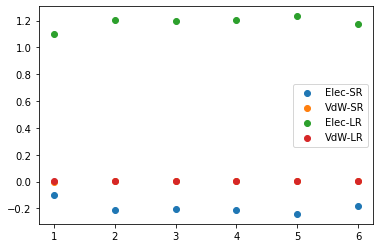

In [23]:
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])

frac_es = [system[i]['frac_contribution'][0] for i in system.keys()]
frac_vs = [system[i]['frac_contribution'][1] for i in system.keys()]
frac_el = [system[i]['frac_contribution'][2] for i in system.keys()]
frac_vl = [system[i]['frac_contribution'][3] for i in system.keys()]
x_frac = [i+1 for i in range(len(frac_es))]


plt.scatter(x_frac,frac_es)
plt.scatter(x_frac,frac_vs)
plt.scatter(x_frac,frac_el)
plt.scatter(x_frac,frac_vl)
# plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(["Elec-SR","VdW-SR","Elec-LR","VdW-LR"])

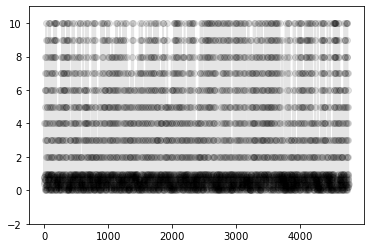

In [24]:
import seaborn as sns

sorted_dataframe = main_data[main_data['sum'] == max(list(main_data['sum']))]
y1 = sorted_dataframe['w1']
y2 = sorted_dataframe['w2']
y3 = sorted_dataframe['w3']
y4 = sorted_dataframe['w4']


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


plt.ylim([-2,11])
# plt.xlim([0,145])


# plt.plot(x1,y1,color = 'b', alpha = .1, marker = 'o')
# plt.plot(x2,y2,color='r', alpha = .1, marker = 'o')
# plt.plot(x3,y3,color ='g', alpha = .1, marker = 'o')
plt.plot(x4,y4, color = 'k', alpha = .1, marker = 'o')


# sns.distplot(y1,color = 'b')
# sns.distplot(y2,color='r')
# sns.distplot(y3,color ='g')
# sns.distplot(y4, color = 'k')





In [25]:
def log_finder(array):
    import math
    out = []
    for i in array:
        if i == 0:
            out.append(0)
        else:
            out.append(math.log10(i))

    out[0] = 0

    return out

Text(0, 0.5, 'log (10 base) weights (w)')

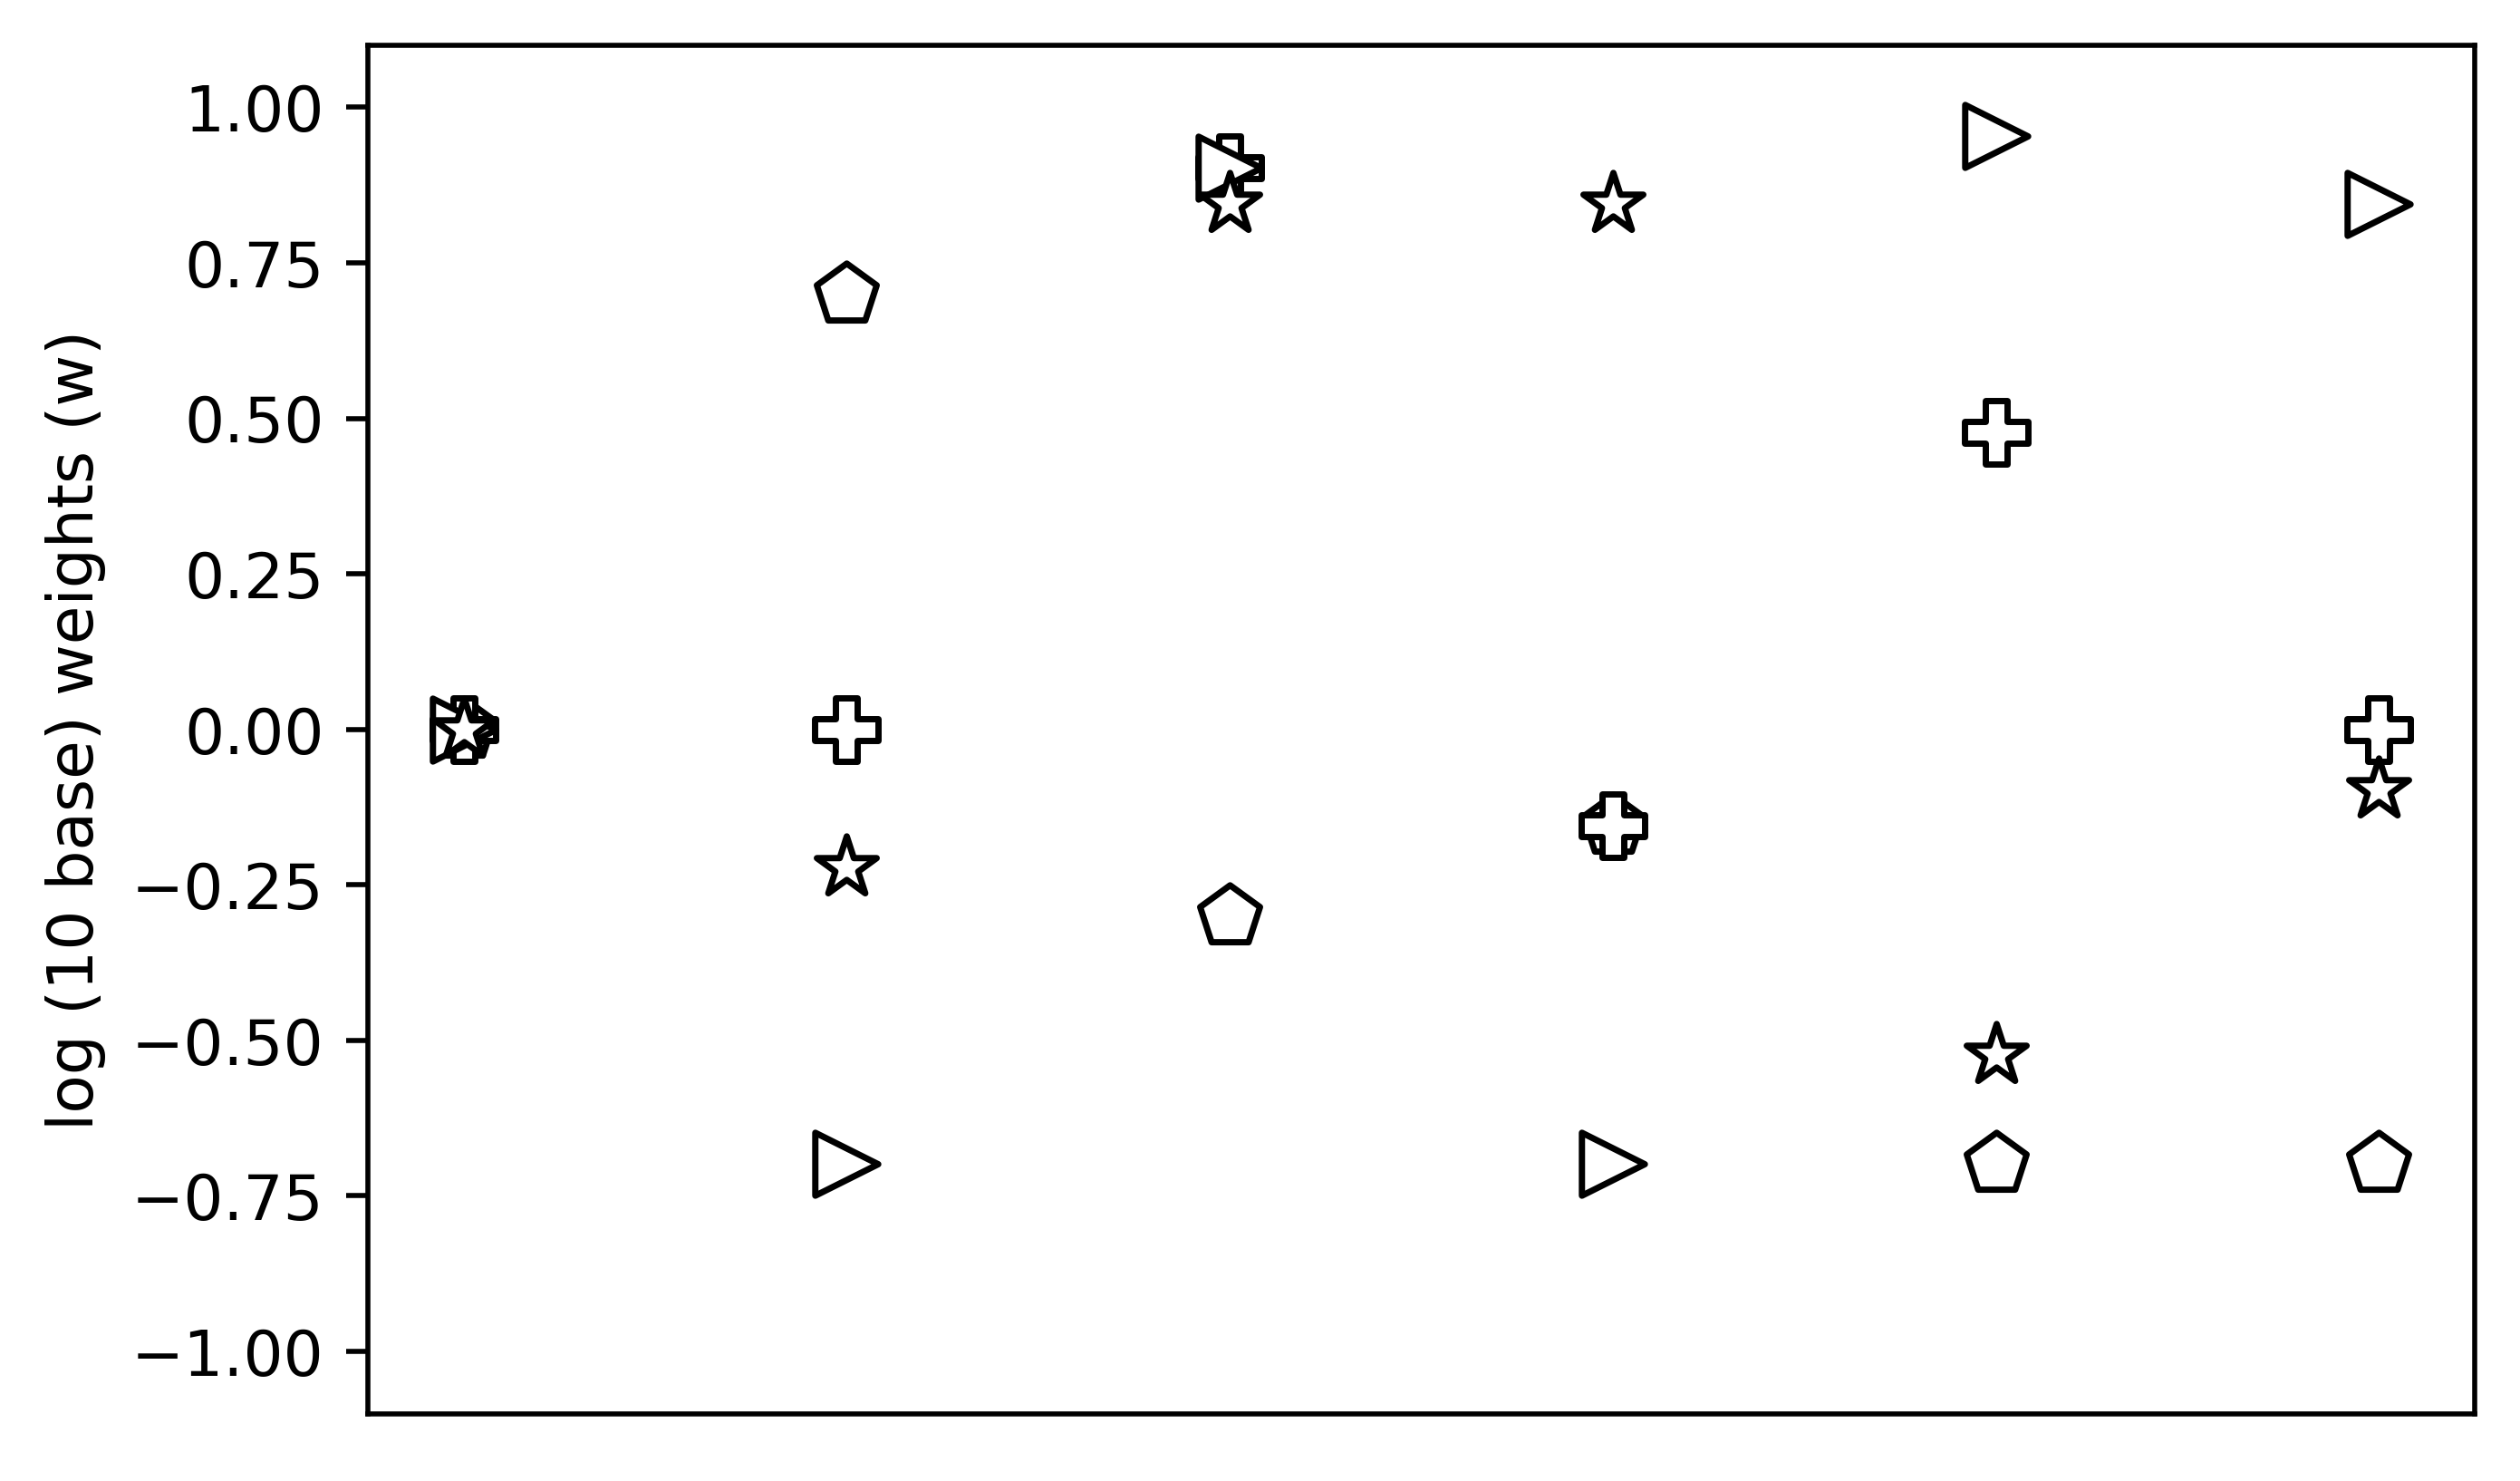

In [40]:
import seaborn as sns
import math


plt.figure(dpi=500)

sorted_dataframe = main_data.drop_duplicates('sum',keep='first')



y1 = log_finder(sorted_dataframe['w1'])
y2 = log_finder(sorted_dataframe['w2'])
y3 = log_finder(sorted_dataframe['w3'])
y4 = log_finder(sorted_dataframe['w4'])


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([-2,11])
# plt.xlim([0,145])


# plt.plot(x1,y1,color = '#91f92e', marker = 'o')
# plt.plot(x2,y2,color='#962ef9', marker = 's')
# plt.plot(x3,y3,color ='#2e91f9', marker = '>')
# plt.plot(x4,y4, color = '#f92e91',marker = '*')

plt.scatter(x1,y1, marker = 'p', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x2,y2, marker = 'P', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x3,y3, marker = '>', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x4,y4, marker = '*', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
# sns.distplot(y1,color = 'b')
# sns.distplot(y2,color='r')
# sns.distplot(y3,color ='g')
# sns.distplot(y4, color = 'k')

plt.xticks([])
plt.ylim([-1.1,1.1])
plt.ylabel('log (10 base) weights (w)')
# plt.legend(['w1','w2','w3','w4'])



In [41]:
sorted_dataframe

,w1,w2,w3,w4,sum
135192,7.0,8.0,10.0,3.0,0.229668
116046,5.0,1.0,0.2,0.6,0.257143
47156,0.5,8.0,8.0,7.0,0.271830
58856,0.7,0.7,0.2,7.0,0.305234
21163,0.2,3.0,9.0,0.3,0.314286
16328,0.2,0.0,7.0,0.8,0.428571
